# 중요 단어 찾기
## 1. 오즈비
오즈비(Odds Ratio, OR)는 두 가지 사건이 발생할 확률을 비교하는 통계적 방법으로, 주로 의학, 사회과학 등의 연구에서 두 변수 간의 관련성을 평가할 때 사용됩니다. 오즈비는 특정 사건이 발생할 확률과 발생하지 않을 확률의 비율을 나타내며, 이를 통해 두 그룹 간의 상대적 중요성을 비교할 수 있습니다.

In [32]:
# 빈도분석
from konlpy.tag import Okt
import pandas as pd


f = open("speech_moon.txt", 'rt', encoding="utf-8")
moon = f.read().split("\n")
f.close()

f = open("speech_park.txt", 'rt', encoding="utf-8")
park = f.read().split("\n")
f.close()

okt = Okt()

box = []

for i in moon:
    t = i.strip()
    for j in okt.nouns(t):
        box.append(['MOON', j])

for i in park:
    t = i.strip()
    for j in okt.nouns(t):
        box.append(['PARK', j])
        
df = pd.DataFrame(box, columns=['President', 'Word'])

,President,Word
0,MOON,정권
1,MOON,교체
2,MOON,정치
3,MOON,교체
4,MOON,시대
...,...,...
2757,PARK,길
2758,PARK,새누리당
2759,PARK,예비
2760,PARK,후보


In [44]:
df['N'] = 1
# pivot_table : 내가 원하는 행과 열을 설정해서 집계값 확인
df2 = df.pivot_table(index=['President','Word'], values='N', aggfunc="sum")
df2 = df.reset_index()

,index,President,Word,N
0,0,MOON,정권,1
1836,1836,PARK,것,1
1837,1837,PARK,결코,1
1838,1838,PARK,수,1
1839,1839,PARK,그,1
...,...,...,...,...
923,923,MOON,기반,1
924,924,MOON,국경,1
925,925,MOON,경쟁,1
917,917,MOON,를,1


In [72]:
df3 = df2.pivot_table(index = "Word", columns="President", values='N', aggfunc="sum", fill_value=0)
df3['ratio_moon'] = (df3['MOON'] + 1) / (sum(df3['MOON'])+1)
df3['ratio_park'] = (df3['PARK'] + 1) / (sum(df3['PARK'])+1)
df3['odds_ratio'] = df3['ratio_moon'] / df3['ratio_park']
df3 = df3.sort_values("odds_ratio")
df3.head()
df3.tail()

President,MOON,PARK,ratio_moon,ratio_park,odds_ratio
Word,,,,,
여성,6,0,0.004217,0.000906,4.655422
말,7,0,0.004819,0.000906,5.320482
벽,7,0,0.004819,0.000906,5.320482
정의,7,0,0.004819,0.000906,5.320482
복지국가,8,0,0.005422,0.000906,5.985542


## 2. TF-IDF
TF-IDF(Term Frequency-Inverse Document Frequency)는 정보 검색과 텍스트 마이닝에서 널리 사용되는 통계적 방법으로, 문서 내에서 단어의 중요도를 측정하는 데 사용됩니다. 이 방법은 특정 단어가 문서 내에서 얼마나 자주 등장하는지(Term Frequency, TF)와 그 단어가 전체 문서 집합에서 얼마나 자주 등장하는지(Inverse Document Frequency, IDF)를 결합하여 단어의 가중치를 계산합니다.

* TF (Term Frequency)
    - TF는 특정 단어가 문서 내에서 등장하는 빈도를 나타냅니다. 이는 단순히 해당 단어의 출현 횟수를 문서 내 총 단어 수로 나누어 계산됩니다.
* IDF (Inverse Document Frequency)
    - IDF는 단어의 일반적 중요도를 측정합니다. 이는 단어가 전체 문서 집합에서 얼마나 드물게 등장하는지를 나타내며, 드문 단어일수록 높은 값을 가집니다.
* TF-IDF
    - TF와 IDF를 결합한 TF-IDF 값은 단어의 상대적 중요도를 나타냅니다. 특정 문서 내에서 많이 등장하지만 전체 문서 집합에서는 드문 단어일수록 높은 TF-IDF 값을 가집니다.

In [85]:
df = pd.read_csv("speeches_presidents.csv")

box = []
for i, j  in zip(df['president'], df['value']):
    for k in okt.nouns(j):
        if len(k) >= 2:
            box.append([i,k])
df2 = pd.DataFrame(box, columns = ['president', 'word'])
df2['N'] = 1

,president,word,N
0,문재인,정권,1
1,문재인,교체,1
2,문재인,정치,1
3,문재인,교체,1
4,문재인,시대,1
...,...,...,...
3029,노무현,후보,1
3030,노무현,경선,1
3031,노무현,공식,1
3032,노무현,선언,1


In [87]:
df3 = df2.pivot_table(index = ['president', 'word'], values='N', aggfunc="sum")
df3 = df3.reset_index()
df3

,president,word,N
0,노무현,가면,1
1,노무현,가슴,2
2,노무현,가야,1
3,노무현,가장,1
4,노무현,가지,1
...,...,...,...
1521,이명박,혼자,1
1522,이명박,환기,1
1523,이명박,후보,1
1524,이명박,희망,2


In [128]:
import numpy as np

box = []
for i in df3['word']:
    count = 0
    for j in df['value']:
        if i in j:
            count += 1
    box.append(count)       
#    print(i, count)
    
df3["DF"] = box
df3['IDF'] = np.log(df3['DF'].max() / df3['DF'])
df3['TF-IDF'] = df3['N'] * df3['IDF']
df3=df3.sort_values(["TF-IDF", 'president'], ascending=False)

df3

,president,word,N,DF,IDF,TF-IDF
1054,박근혜,박근혜,9,1,1.386294,12.476649
493,문재인,복지국가,8,1,1.386294,11.090355
173,노무현,정계,8,1,1.386294,11.090355
529,문재인,산업,14,2,0.693147,9.704061
1378,이명박,리더십,6,1,1.386294,8.317766
...,...,...,...,...,...,...
193,노무현,지금,2,4,0.000000,0.000000
19,노무현,과거,1,4,0.000000,0.000000
62,노무현,마음,1,4,0.000000,0.000000
14,노무현,경제,1,4,0.000000,0.000000


In [122]:
df3[df3['president'] == '문재인'].sort_values("TF-IDF", ascending=False).head()

,president,word,N,DF,IDF,TF-IDF
493,문재인,복지국가,8,1,1.386294,11.090355
529,문재인,산업,14,2,0.693147,9.704061
623,문재인,여성,6,1,1.386294,8.317766
895,문재인,확대,11,2,0.693147,7.624619
647,문재인,우리나라,10,2,0.693147,6.931472


# RNN & LSTM
RNN(Recurrent Neural Network)과 LSTM(Long Short-Term Memory)은 딥러닝에서 주로 시퀀스 데이터를 처리하는 데 사용되는 신경망 구조입니다.

* RNN: RNN은 순환 신경망으로, 시퀀스 데이터(예: 텍스트, 시계열 데이터, 음성 등)를 처리하기 위해 설계된 신경망입니다. RNN은 입력 데이터뿐만 아니라 이전 시점의 정보를 기억하고 활용하여 현재 시점의 출력을 생성할 수 있는 구조를 가지고 있습니다.
* LSTM: LSTM은 RNN의 단점을 보완하기 위해 제안된 신경망 구조로, 긴 시퀀스 데이터에서도 효과적으로 학습할 수 있도록 설계되었습니다. LSTM은 중요한 정보를 장기적으로 기억하고, 불필요한 정보를 선택적으로 잊을 수 있는 메커니즘을 가지고 있습니다.

In [131]:
# 이미지데이터 : CNN
# 텍스트데이터 ; RNN

text = "I love you".split()
text


dic = {}
box = []
for i in text:
    if i not in dic:
        dic[i] = len(dic)
    box.append()

['I', 'love', 'you']

In [135]:
from tensorflow import keras

# 영화 리뷰 데이터 : 긍정(1), 부정(0)
(train_x, train_y), (test_x, test_y) = keras.datasets.imdb.load_data(num_words=500) # 가장 많이 사용된 단어 순 1~500등

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(array([1.7598e+04, 5.3690e+03, 1.4070e+03, 5.1700e+02, 9.4000e+01,
        7.0000e+00, 5.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  11. ,  259.3,  507.6,  755.9, 1004.2, 1252.5, 1500.8, 1749.1,
        1997.4, 2245.7, 2494. ]),
 <BarContainer object of 10 artists>)

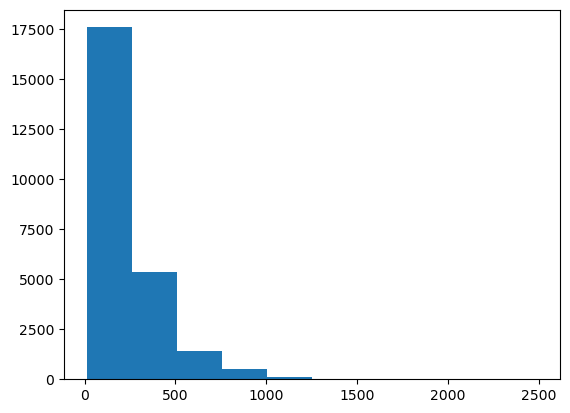

In [150]:
import matplotlib.pyplot as plt
box = []
for i in train_x:
    box.append(len(i))
plt.hist(box)

In [154]:
from keras.preprocessing.sequence import pad_sequences # 텍스트 데이터 길이 맞춤
train_seq = pad_sequences(train_x, maxlen=100)
test_seq = pad_sequences(test_x, maxlen=100)
train_seq.shape, test_seq.shape

((25000, 100), (25000, 100))

In [156]:
train_oh = keras.utils.to_categorical(train_seq)
test_oh = keras.utils.to_categorical(test_seq)
train_oh, test_oh

(array([[[0., 0., 1., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 1., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 1., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 1., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 1., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 1., ..., 0., 0., 0.],


In [172]:
train_oh.shape, test_oh.shape
model = keras.Sequential()
model.add(keras.layers.LSTM(8, activation='relu', input_shape=(100,500)))
model.add(keras.layers.Dense(2, activation='softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(train_oh, train_y, epochs=10)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.5754 - loss: 6486.8853
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.6714 - loss: 145323.3750
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6762 - loss: 0.6503
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6974 - loss: 0.5854
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.6979 - loss: 0.5996
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.6983 - loss: 0.5654
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7031 - loss: 0.5655
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.7074 - loss: 1.0225
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7012 - loss: 22.2973
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.6962 - loss: 0.5984


In [173]:
model.evaluate(test_oh, test_y)

782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.6747 - loss: 1.3672


[2.1332290172576904, 0.6761199831962585]

In [ ]:
evaluate

# 비지도 학습
비지도 학습(Unsupervised Learning)은 머신러닝의 한 종류로, 라벨링된 데이터 없이 모델을 학습시키는 방법입니다. 비지도 학습은 데이터의 구조나 패턴을 발견하는 데 주로 사용됩니다. 이를 통해 데이터의 분포를 이해하거나, 데이터를 군집화하여 유사한 그룹으로 나누거나, 차원 축소를 통해 데이터의 중요한 특징을 추출할 수 있습니다.

## 군집화
### 1. K-평균(K-Means)
데이터를 K개의 클러스터로 나눕니다. 각 클러스터는 하나의 중심점(centroid)을 가지고 있으며, 데이터 포인트는 가장 가까운 중심점에 할당됩니다.

<function matplotlib.pyplot.show(close=None, block=None)>

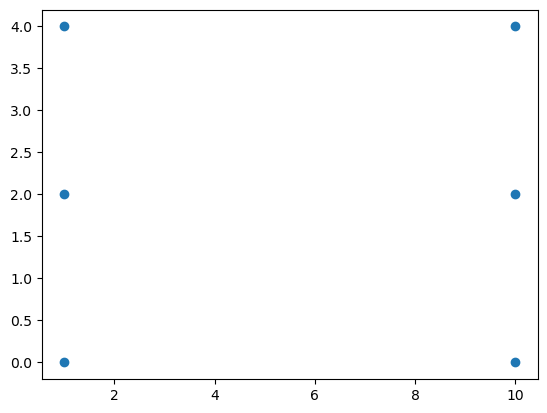

In [201]:
# 샘플 데이터 생성

import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

X
plt.scatter(X[:, 0], X[:,1])
plt.show

In [223]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init="auto")
km.fit(X)

KMeans(n_clusters=3, n_init='auto')

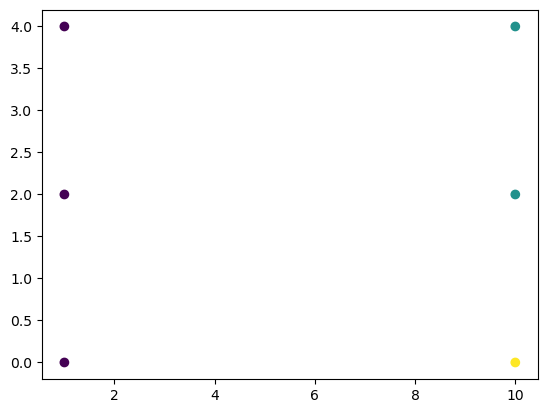

In [225]:
labels = km.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels)

### 2. 계층적 군집화(Hierarchical Clustering)
데이터의 계층적 구조를 만들어 나가는 방법으로, 덴드로그램(dendrogram)을 통해 시각화할 수 있습니다.
* 워드 연결법 (Ward Linkage): 두 클러스터를 병합했을 때, 총 제곱 오차 합의 증가량을 최소화하는 방식으로 클러스터를 병합합니다. 이는 클러스터 내의 분산을 최소화하는 효과가 있습니다.

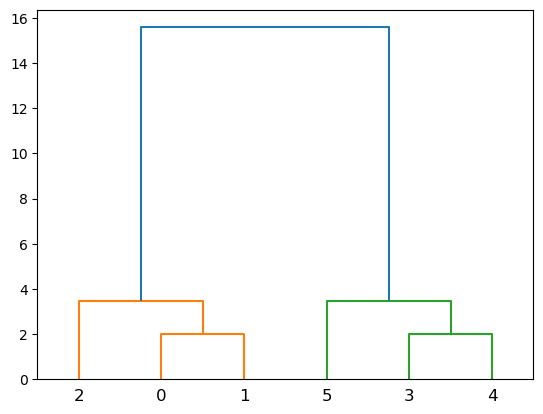

In [233]:
import scipy.cluster.hierarchy as sch
dendrogram =sch.dendrogram(sch.linkage(X, method='ward'))

### 과일 사진 군집 분류하기

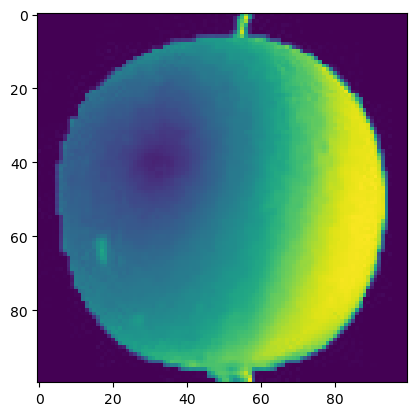

In [237]:
import numpy as np

# 0~99 사과, 100~199: 파인애플, 200~299: 바나나
fruits = np.load("fruits_300.npy")
fruits.shape
plt.imshow(fruits[0])

In [247]:
fruits2 = fruits.reshape(300, 10000)
fruits2.shape

km = KMeans(n_clusters=3, n_init="auto") 
km.fit(fruits2)
labels = km.labels_
labels

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

train_x, test_x, train_y, test_y = train_test_split(fruits2, labels)
rf = RandomForestClassifier()
rf.fit(train_x, train_y)


RandomForestClassifier()

In [251]:
report = classification_report(test_y, rf.predict(test_x))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        26

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



#### 1. PCA (주성분분석)
주성분 분석(Principal Component Analysis, PCA)은 데이터 분석과 기계 학습에서 차원 축소를 위해 널리 사용되는 기법입니다. 차원 축소란 고차원 데이터에서 중요한 정보만을 추출하여 저차원 공간으로 변환하는 것을 말합니다.

In [278]:
print(fruits2.shape)

from sklearn.decomposition import PCA

fruits2 = fruits.reshape(300, 10000)
km = KMeans(n_clusters=3, n_init="auto") 
km.fit(fruits2)
labels = km.labels_

#pca = PCA(n_components=100) # 10000개를 표현하는 대표적인 주성분 2개를 찾는다. => 차원을 확 축소시킴
pca = PCA(n_components=0.99) # 0.99 만큼의 설명력을 같은 주성분을 알아서 찾음 => 162개가 나옴
fruits_pca = pca.fit_transform(fruits2)
print(sum(pca.explained_variance_ratio_))
fruits_pca.shape

(300, 10000)
0.9901619970681561


(300, 162)

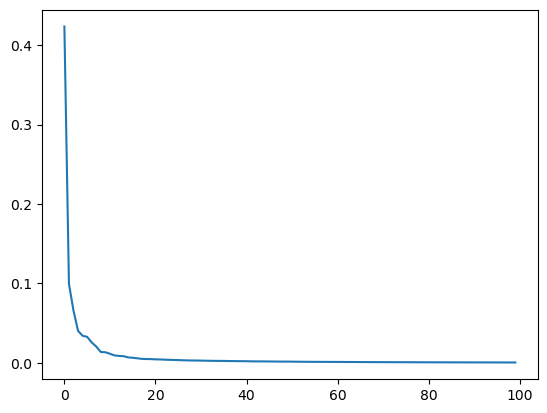

In [275]:
plt.plot(pca.explained_variance_ratio_) # 주성분의 최적화 찾기 아마 10~20 정도면 loss가 주니 대부분 찾을정도임

In [280]:
train_x, test_x, train_y, test_y = train_test_split(fruits_pca, labels)
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
report = classification_report(test_y, rf.predict(test_x))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



### 만약 군집이 몇 개가 존재하는지 모른다면?
#### 1. 이너셔를 통한 군집 추론

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

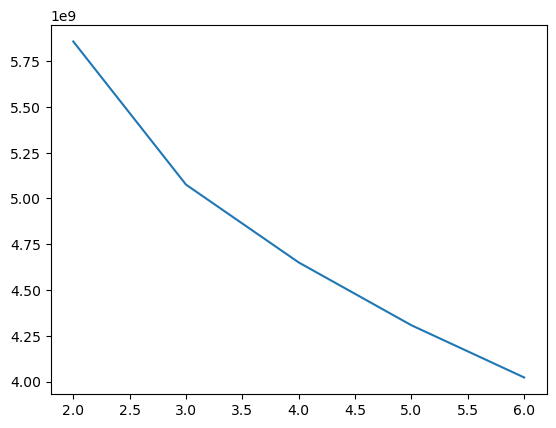

In [254]:
box = []
for n in range(2, 7):
    km = KMeans(n_clusters=n)
    km.fit(fruits2)
    box.append(km.inertia_)
plt.plot(range(2,7), box)
plt.show()

#### 2. 실루엣 분석을 통한 군집 추론
실루엣 분석(Silhouette Analysis)은 클러스터링 성능을 평가하는 방법 중 하나로, 각 데이터 포인트가 자신의 클러스터에 얼마나 잘 맞는지를 나타내는 척도입니다. 실루엣 분석은 실루엣 계수(Silhouette Coefficient)를 사용하여 각 데이터 포인트가 해당 클러스터 내에 잘 맞는지를 평가합니다. 실루엣 계수는 -1에서 1 사이의 값을 가집니다.

* 𝑠(𝑖)가 1에 가까울수록 해당 데이터 포인트가 자신의 클러스터에 잘 맞으며 다른 클러스터와 잘 분리되어 있다는 것을 의미합니다.
* 𝑠(𝑖)가 0에 가까울수록 클러스터 경계에 위치해 있다는 것을 의미합니다.
* 𝑠(𝑖)가 음수이면 해당 데이터 포인트가 잘못된 클러스터에 속해 있음을 나타냅니다.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

for n in range(2,7):
    km = KMeans(n_clusters=n)
    km.fit(fruits2)
    labels = km.labels_
    score = silhouette_score(fruits2, labels)
    print(n, score)

### ChatGPT 활용하기

In [190]:
#!pip install openai
from openai import OpenAI
import openai

# OpenAI API 키 설정
openai.api_key = {use your api_key}

def call_gpt_4(prompt, model="gpt-4", max_tokens=150):
    response = openai.ChatCompletion.create(
        model=model,
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt},
        ],
        max_tokens=max_tokens,
        temperature=0.7,
    )
    return response.choices[0].message['content'].strip()

# 테스트: GPT-4에 질문하기
prompt = "Explain the concept of machine learning."
response = call_gpt_4(prompt)
print(response)

APIRemovedInV1: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


In [194]:
model = client.images.generate(model = 'dall-e-3',
                              prompt="베트남 여행간 여행객이 지쳐서 잠시 쉬고 있는 캐릭터를 일본 애니메이션 풍으로 그려줘",
                              size = '1024x1024',
                              quality='standard',
                              n = 1)

BadRequestError: Error code: 400 - {'error': {'code': 'billing_hard_limit_reached', 'message': 'Billing hard limit has been reached', 'param': None, 'type': 'invalid_request_error'}}

In [184]:
!pip install openai